In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Load dataset
file_path = "/content/ali baba stock price.xlsx"
df = pd.read_excel(file_path)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date (if not already sorted)
df = df.sort_values(by="Date")

# Display first few rows
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-19,90.673950,93.889999,99.699997,89.949997,92.699997,271879400
1,2014-09-22,86.810966,89.889999,92.949997,89.500000,92.699997,66657800
2,2014-09-23,84.184128,87.169998,90.480003,86.620003,88.940002,39009800
3,2014-09-24,87.467667,90.570000,90.570000,87.220001,88.470001,32088000
4,2014-09-25,85.874191,88.919998,91.500000,88.500000,91.089996,28598000


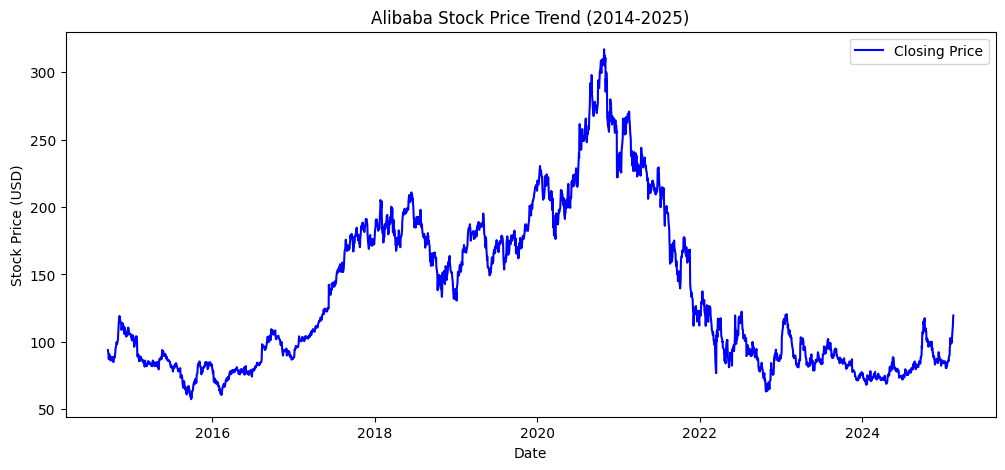

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Alibaba Stock Price Trend (2014-2025)")
plt.legend()
plt.show()


In [ ]:
# Summary of stock prices
df[['Open', 'High', 'Low', 'Close', 'Adj Close']].describe()

,Open,High,Low,Close,Adj Close
count,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000
mean,135.248746,136.919684,133.360942,135.153905,130.763001
std,59.037467,59.579593,58.244218,58.951556,56.741744
min,57.299999,58.650002,57.200001,57.389999,55.424198
25%,85.000000,85.699997,84.000000,84.849998,82.445793
50%,108.500000,110.650002,107.260002,108.989998,105.469185
75%,179.369995,181.389999,177.000000,179.199997,173.061798
max,313.500000,319.320007,308.910004,317.140015,306.276886


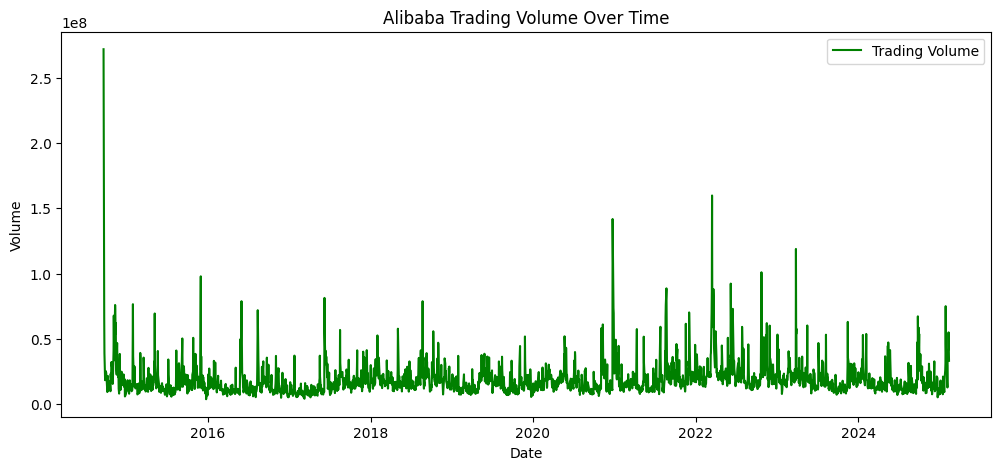

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Volume'], label='Trading Volume', color='green')
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Alibaba Trading Volume Over Time")
plt.legend()
plt.show()

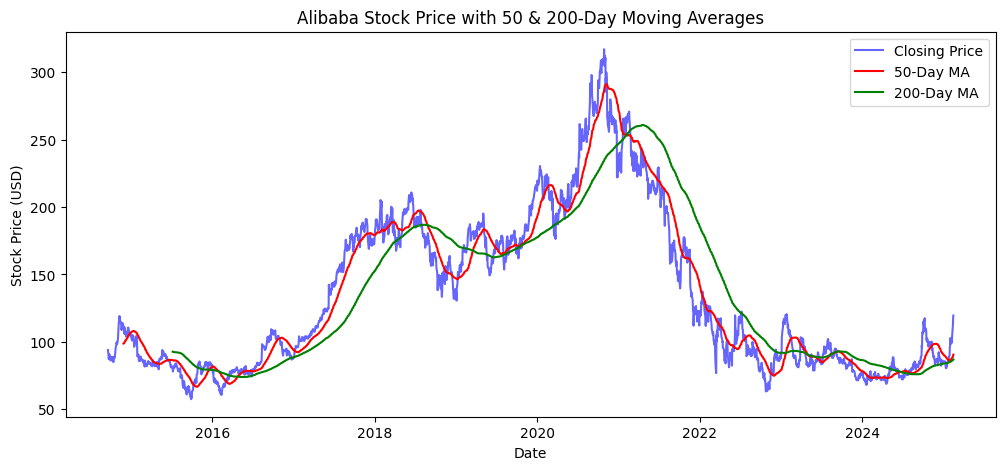

In [ ]:
# Calculate moving averages
df['MA_50'] = df['Close'].rolling(window=50).mean()  # 50-day moving average
df['MA_200'] = df['Close'].rolling(window=200).mean()  # 200-day moving average

# Plot moving averages
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(df['Date'], df['MA_50'], label='50-Day MA', color='red')
plt.plot(df['Date'], df['MA_200'], label='200-Day MA', color='green')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Alibaba Stock Price with 50 & 200-Day Moving Averages")
plt.legend()
plt.show()

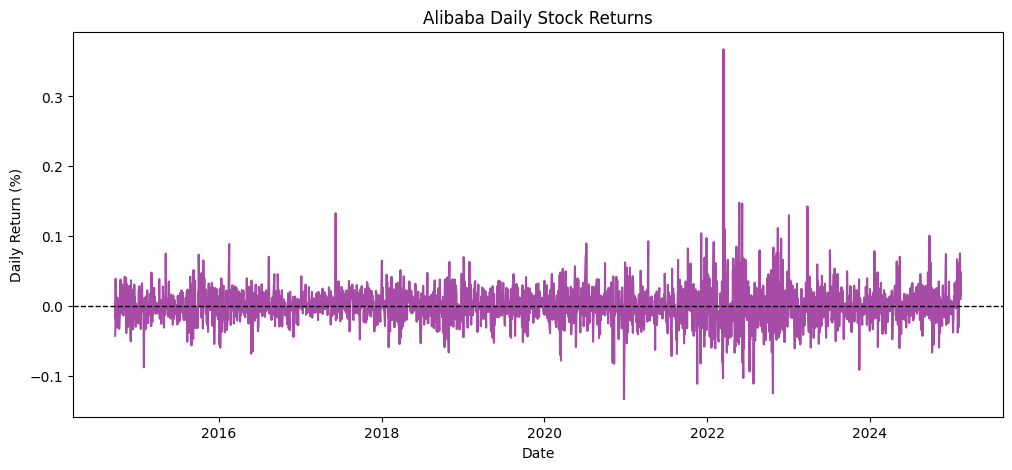

In [ ]:
# Calculate daily returns (percentage change)
df['Daily_Return'] = df['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Daily_Return'], color='purple', alpha=0.7)
plt.axhline(0, linestyle="--", color='black', linewidth=1)
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.title("Alibaba Daily Stock Returns")
plt.show()

<ipython-input-6-ecedb73d1b5a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")


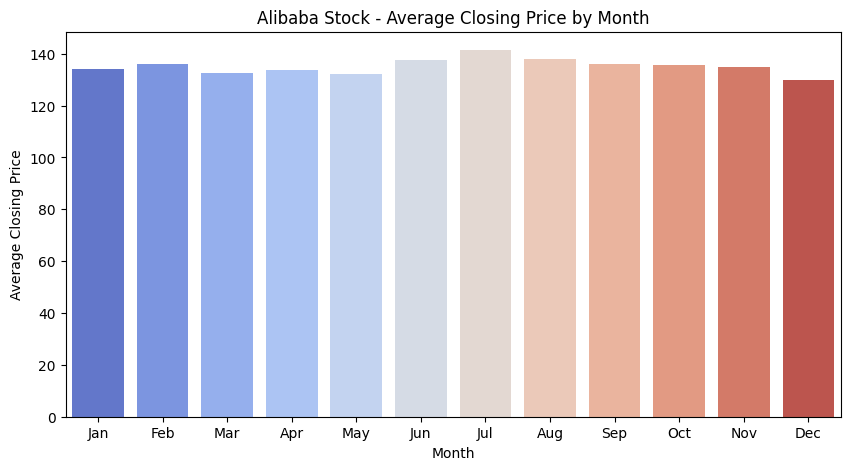

In [ ]:
# Extract month and year
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by month to find average stock price per month
monthly_avg = df.groupby('Month')['Close'].mean()

# Plot seasonal trend
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.title("Alibaba Stock - Average Closing Price by Month")
plt.xticks(range(0, 12),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [ ]:
# Rename columns to match Prophet's format
df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize the model
model = Prophet()

# Fit the model
model.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp90woydfr/9npx4e5o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp90woydfr/82zhkmwn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36440', 'data', 'file=/tmp/tmp90woydfr/9npx4e5o.json', 'init=/tmp/tmp90woydfr/82zhkmwn.json', 'output', 'file=/tmp/tmp90woydfr/prophet_modelp0u60nr1/prophet_model-20250214235346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:53:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:53:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


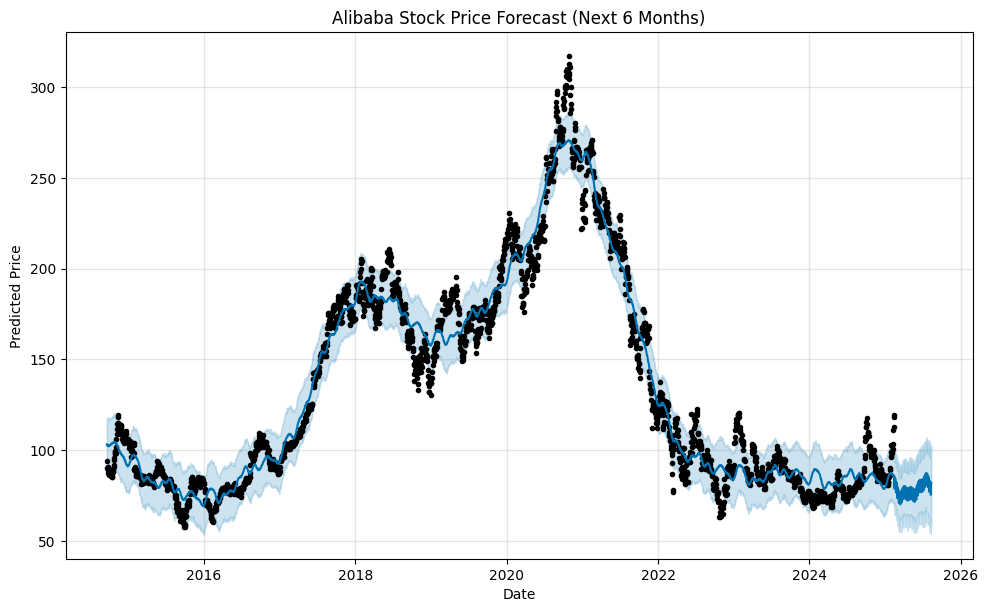

In [ ]:
# Create future dates (6 months ahead)
future_dates = model.make_future_dataframe(periods=180)

# Predict stock prices
forecast = model.predict(future_dates)

# Plot forecast
fig = model.plot(forecast)
plt.title("Alibaba Stock Price Forecast (Next 6 Months)")
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.show()

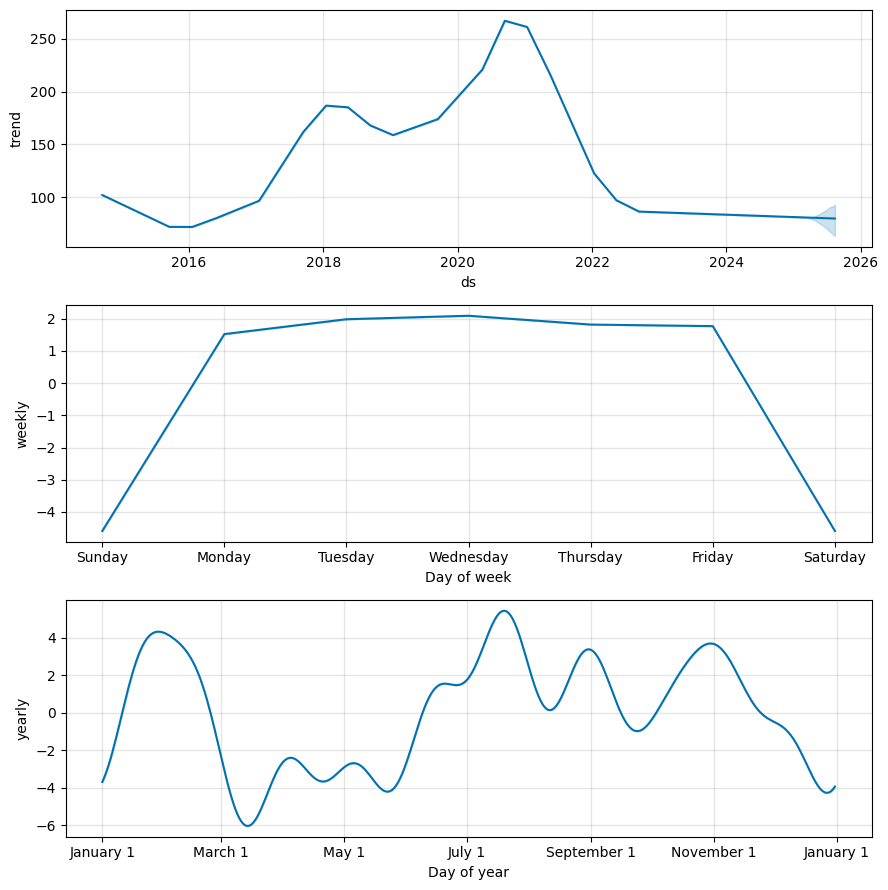

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()